# Classifiation de différents vins avec un réseau de neurone

## 1. Importation des modules

In [1]:
from numpy import *
from numpy.random import *
from matplotlib.pyplot import *
from keras.models import Sequential
from keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

## 2. Importation des données

In [2]:
data = pd.read_csv ('wine.csv')
data.head ()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
x = data [["Ash","Acl","Alcohol","Malic.acid","Mg","Phenols","Flavanoids","Nonflavanoid.phenols","Proanth","Color.int","Hue","OD","Proline"]]
y = data [["Wine"]]

x = x.values
y = y.values - 1
y = y.reshape (130,)

xtrain, xtest, ytrain, ytest = train_test_split (x, y, test_size = 0.20)
#xtest, xval, ytest, yval = train_test_split (xtest, ytest, test_size = 0.5)
#xtrain.shape, xtest.shape, xval.shape
x[0:2, 1:3]

array([[15.6 , 14.23],
       [11.2 , 13.2 ]])

## 3. Visualisation des données

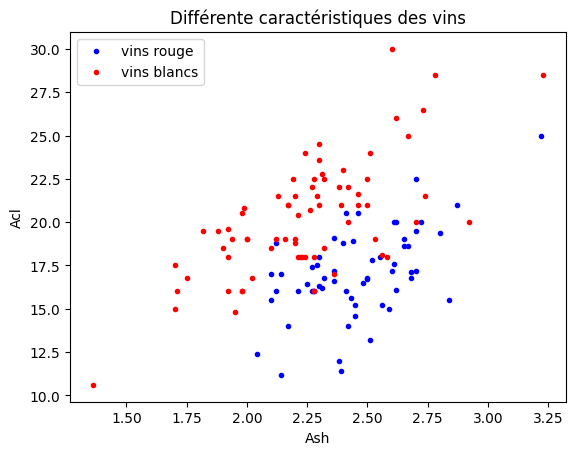

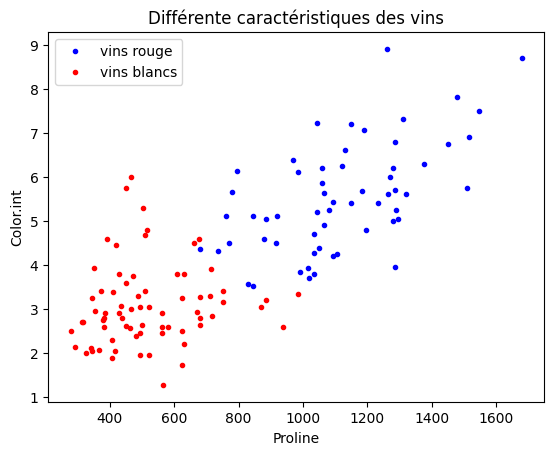

In [4]:
plot (x[:59, 0], x[:59, 1], "b.", label = "vins rouge")
plot (x[59:, 0], x[59:, 1], "r.", label = "vins blancs")
title ("Différente caractéristiques des vins")
xlabel ("Ash")
ylabel ("Acl")
legend ()
show ()

plot (x[:59, 12], x[:59, 9], "b.", label = "vins rouge")
plot (x[59:, 12], x[59:, 9], "r.", label = "vins blancs")
title ("Différente caractéristiques des vins")
xlabel ("Proline")
ylabel ("Color.int")
legend ()
show ()

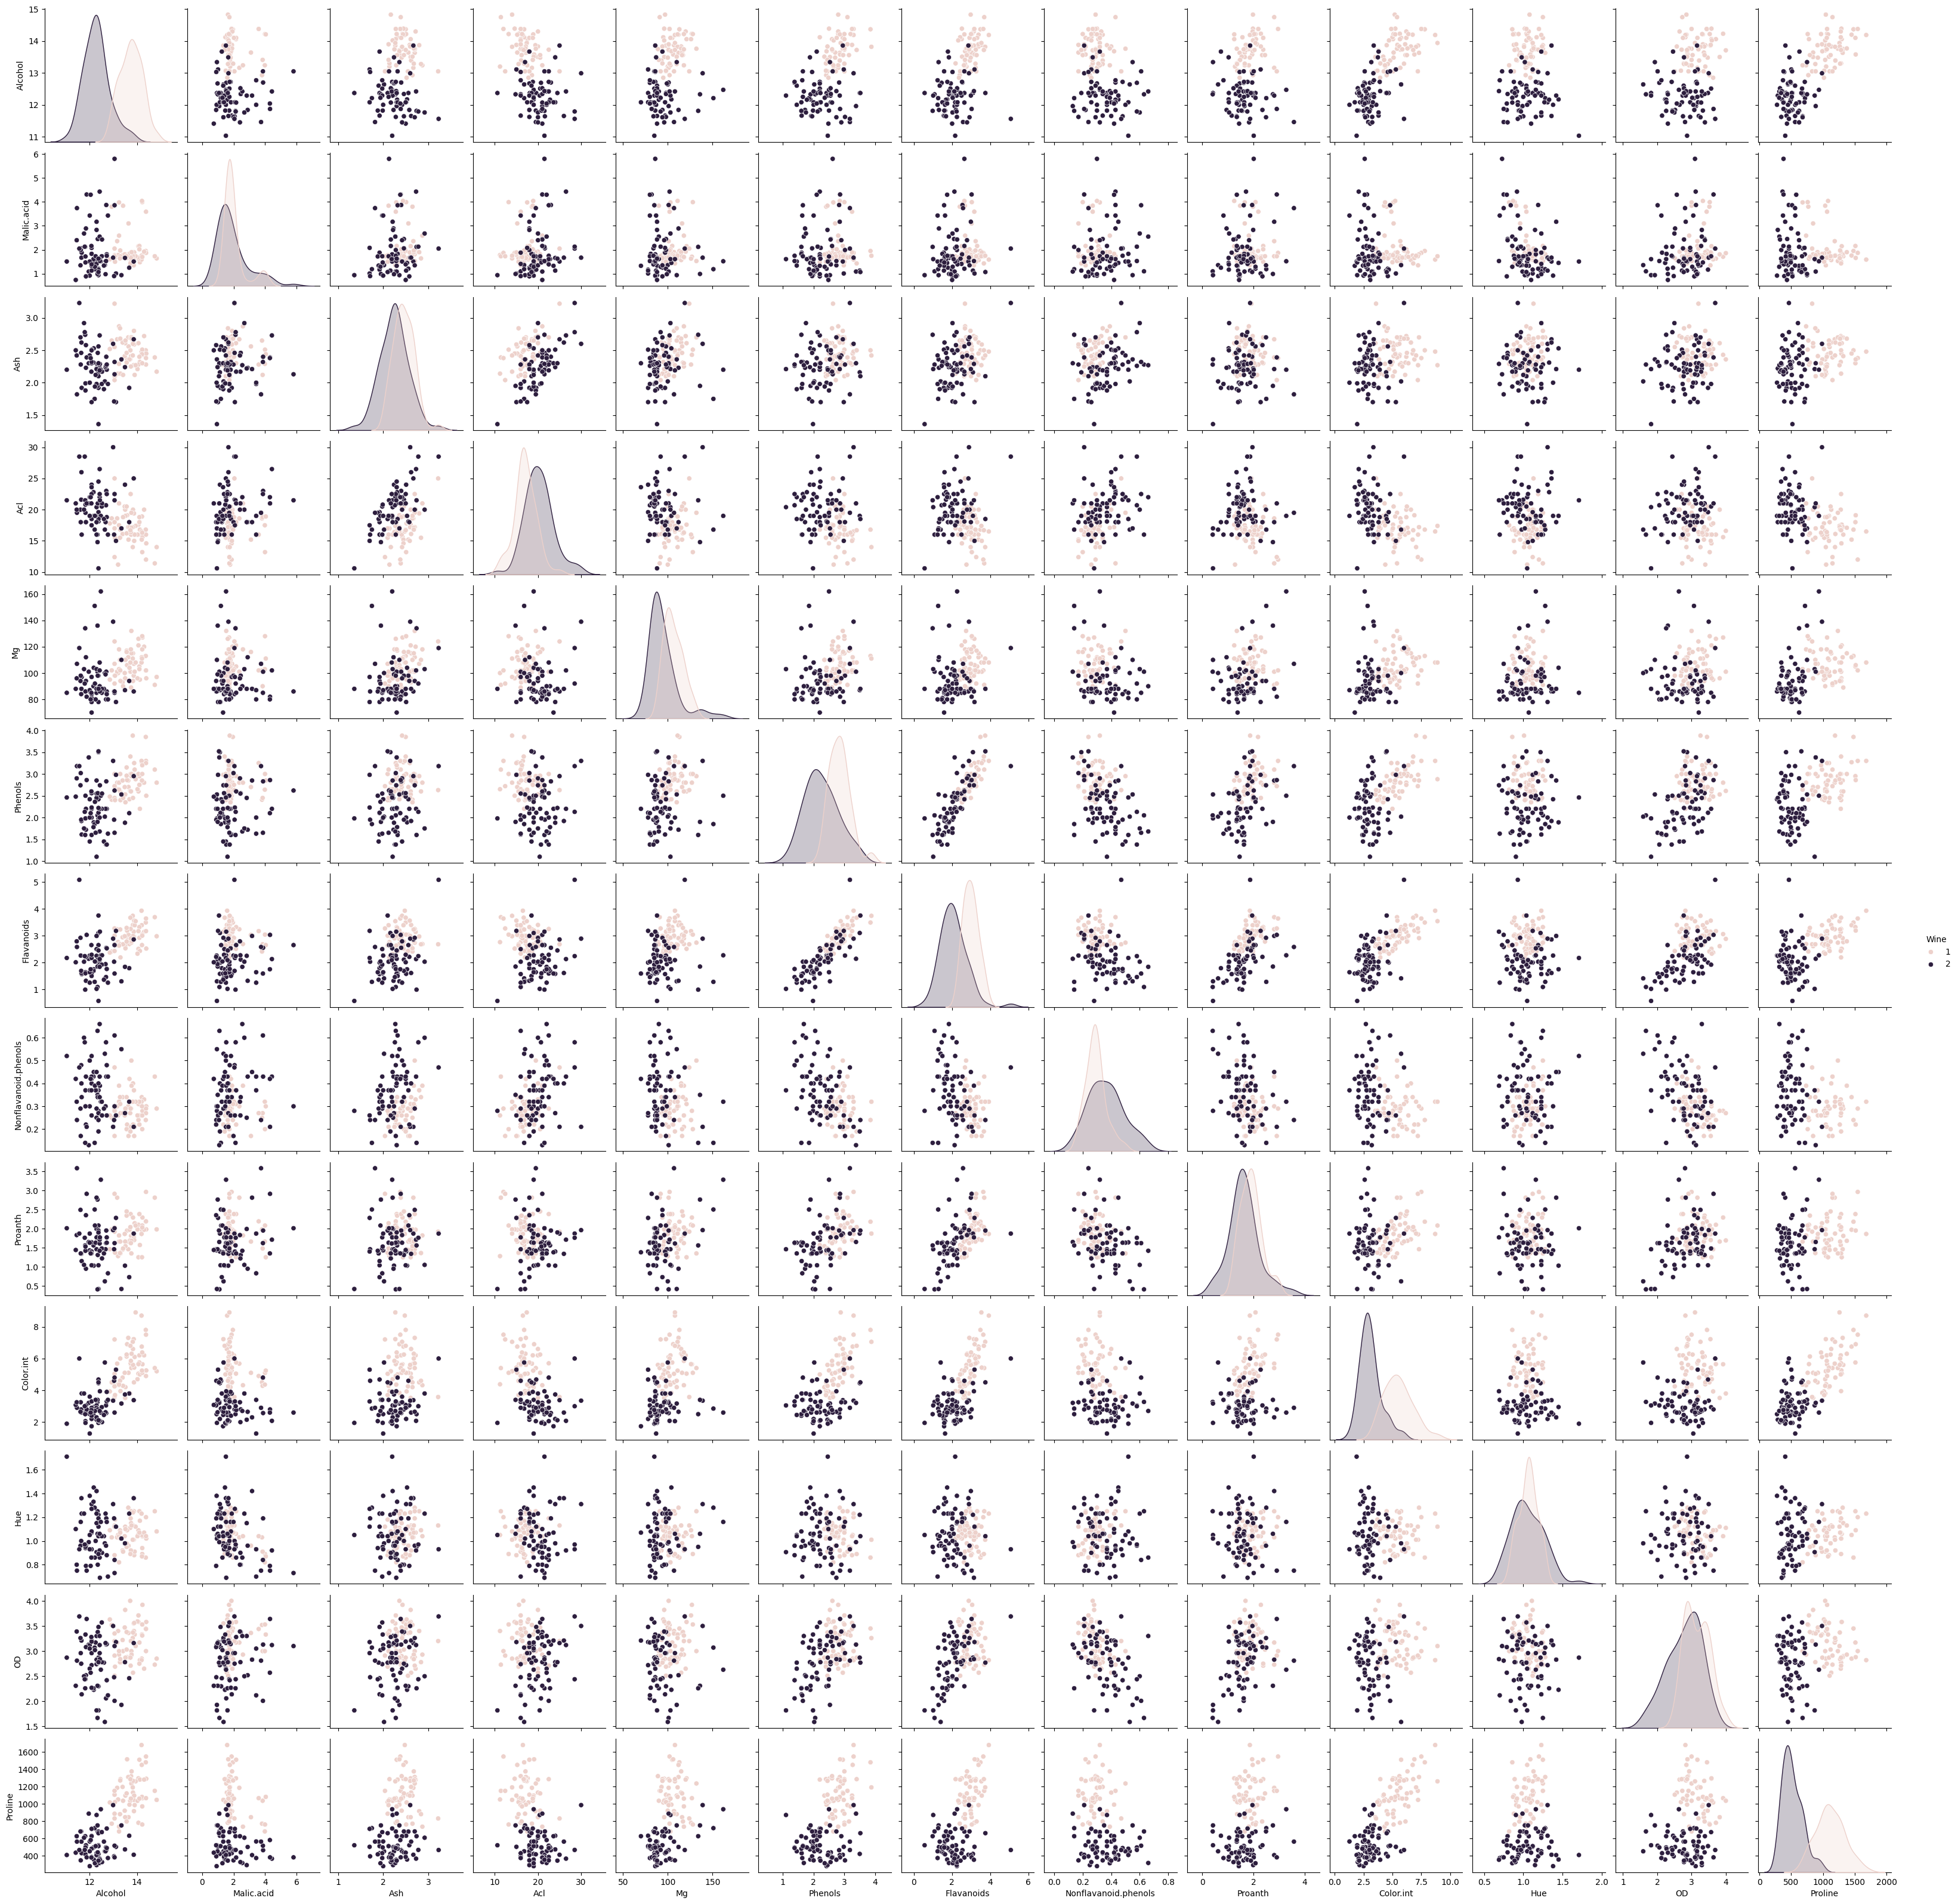

In [5]:
sns.pairplot (data, hue = "Wine")

## 3. Création du modèle

In [6]:
model = Sequential ()

model.add (layers.Input (shape = (13,)))

model.add (layers.Dense (32, activation = "relu"))
model.add (layers.Dense (32, activation = "relu"))
model.add (layers.Dense (32, activation = "relu"))
model.add (layers.Dense (1, activation = "sigmoid"))

model.summary ()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,593 (10.13 KB)

 Trainable params: 2,593 (10.13 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Entrainnement du modèle

In [7]:
model.compile (optimizer = "Adam", loss = "bce", metrics = ["accuracy"])

history = model.fit (xtrain, ytrain, epochs = 100, verbose = 1, validation_data = (xtest, ytest), batch_size = 8)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5061 - loss: 4.4969 - val_accuracy: 0.7692 - val_loss: 0.7485
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7889 - loss: 0.5122 - val_accuracy: 0.8846 - val_loss: 0.2870
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8525 - loss: 0.3244 - val_accuracy: 0.8462 - val_loss: 0.3181
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8991 - loss: 0.3895 - val_accuracy: 0.8846 - val_loss: 0.3383
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9021 - loss: 0.3860 - val_accuracy: 0.8846 - val_loss: 0.2951
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9610 - loss: 0.1873 - val_accuracy: 0.9615 - val_loss: 0.2874
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8238 - loss: 0.4275 - val_accuracy: 0.9231 - val_loss: 0.2079
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.8476 - loss: 0.2909 - val_accuracy: 0.7692 -

## 6. Visualisation des performances

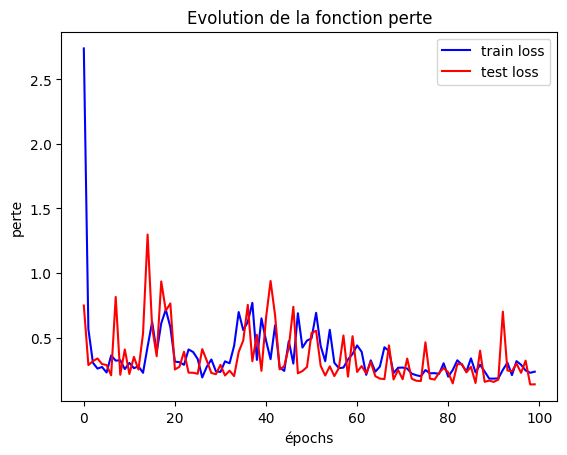

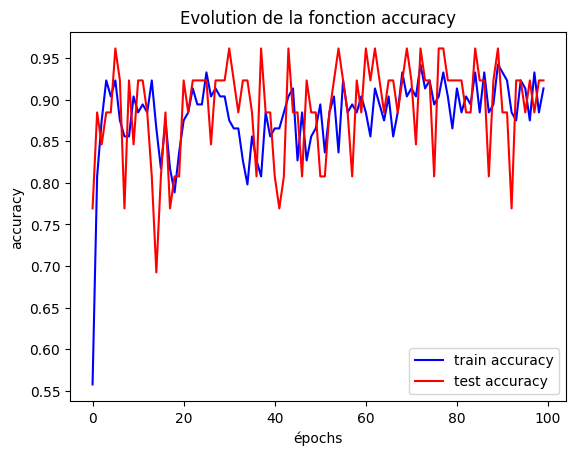

In [8]:
trainloss = history.history ["loss"]
testloss = history.history ["val_loss"]
trainaccuracy = history.history ["accuracy"]
testaccuracy = history.history ["val_accuracy"]

plot (range (100), trainloss, "b", label = "train loss")
plot (range (100), testloss, "r", label = "test loss")
title ("Evolution de la fonction perte")
xlabel ("épochs")
ylabel ("perte")
legend ()
show ()

plot (range (100), trainaccuracy, "b", label = "train accuracy")
plot (range (100), testaccuracy, "r", label = "test accuracy")
title ("Evolution de la fonction accuracy")
xlabel ("épochs")
ylabel ("accuracy")
legend ()
show ()

## 7. Validation du modèle

In [9]:
loss, accuracy = model.evaluate (xtest, ytest)
print (" ")
print (f" Le modèle a une précision de {accuracy*100} pourcent")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9231 - loss: 0.1380
 
 Le modèle a une précision de 92.30769276618958 pourcent
